In [169]:
#ISYE 6402 Spring 2020
#Final Initialization Code


data <- read.csv("Stock growth.csv", header=TRUE)
data <- data[,c(2,3,4,5)]

AAPL=data$AAPL
AMZN=data$AMZN
FB=data$FB
GOOG=data$GOOG



data.ts <- ts(data)
dif.ts <- data.frame(diff(data.ts))

train <- data[c(1:261),]
train.dif <- dif.ts[c(1:260),]
test <- data[c(262:270),]
test.dif <- dif.ts[c(261:269),]


head(data, n=5)
tail(data, n=5)

,AAPL,AMZN,FB,GOOG
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000000,0.000000000,0.000000000,0.000000000
2,0.01175838,-0.001231038,-0.003107666,0.009254949
3,0.01672089,0.022661581,0.010186464,0.021811350
4,-0.06210659,-0.009044559,-0.047997222,-0.013917391
5,-0.05786610,-0.125819629,0.083390921,-0.000614651


,AAPL,AMZN,FB,GOOG
,<dbl>,<dbl>,<dbl>,<dbl>
266,1.257721,3.167550,1.955111,1.0200648
267,1.215077,3.115293,1.849447,0.9766665
268,1.215595,3.089089,1.801968,0.9717133
269,1.259666,3.111248,1.833736,0.9656671
270,1.266665,3.123031,1.810946,0.9672889


In [ ]:
Answer:all four sets show constant mean, acf & pacf within the band meaning autocorrelation not chaning by 
shift in time (only first 1 out is in acf). However, all show clusters of variability toward the recent years
and is more pronounced for GOOG and AMZN


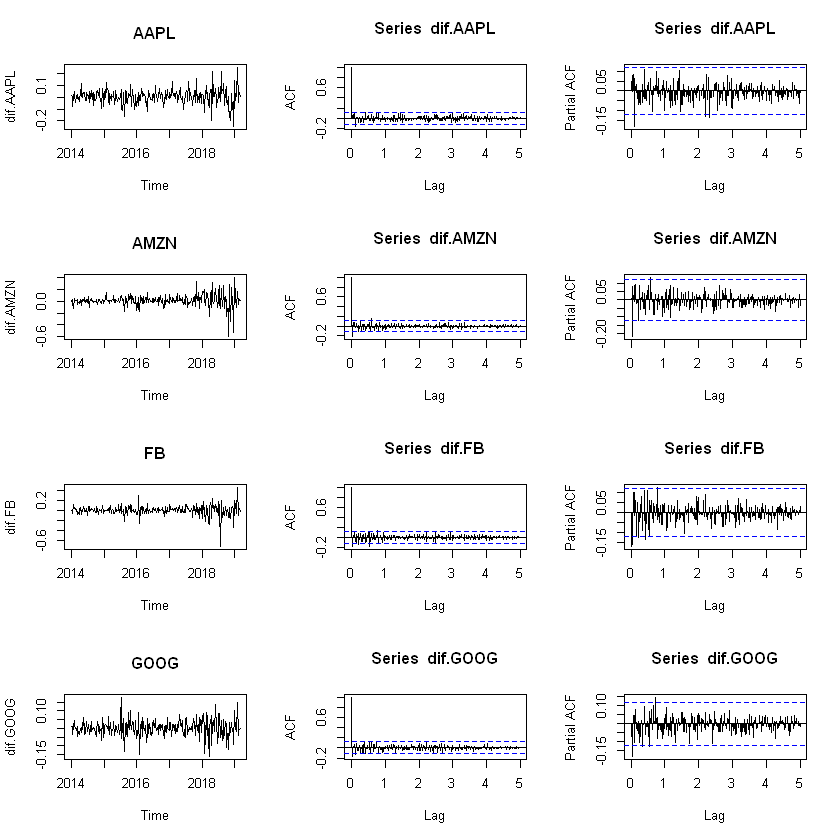

In [170]:
##Exploratory Data Analysis

dif.AAPL=ts(dif.ts$AAPL, start=c(2014,1), freq=52)
dif.AMZN=ts(dif.ts$AMZN, start=c(2014,1), freq=52)
dif.FB=ts(dif.ts$FB, start=c(2014,1), freq=52)
dif.GOOG=ts(dif.ts$GOOG, start=c(2014,1), freq=52)


#Plots
par(mfrow=c(4,3))
plot(dif.AAPL, main="AAPL")
stats::acf(dif.AAPL, lag.max=52*5)
stats::pacf(dif.AAPL, lag.max=52*5)

plot(dif.AMZN, main="AMZN")
stats::acf(dif.AMZN, lag.max=52*5)
stats::pacf(dif.AMZN, lag.max=52*5)

plot(dif.FB, main="FB")
stats::acf(dif.FB, lag.max=52*5)
stats::pacf(dif.FB, lag.max=52*5)

plot(dif.GOOG, main="GOOG")
stats::acf(dif.GOOG, lag.max=52*5)
stats::pacf(dif.GOOG, lag.max=52*5)

In [ ]:
Answer: No, we aplied two different approchaes on two different data sets. not comparable.

In [172]:
time.pts = c(1:length(AMZN))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
x1 = time.pts
x2 = time.pts^2
poly.AMZN= lm(AMZN~x1+x2)
summary(poly.AMZN)


gam.FB = gam(FB~s(time.pts))
summary(gam.FB)


Call:
lm(formula = AMZN ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1362 -0.1559 -0.0383  0.1156  1.0546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.20091    0.05378  -3.736 0.000229 ***
x1           0.02447    0.24936   0.098 0.921903    
x2           4.01028    0.24228  16.552  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2967 on 267 degrees of freedom
Multiple R-squared:  0.9428,	Adjusted R-squared:  0.9424 
F-statistic:  2202 on 2 and 267 DF,  p-value: < 2.2e-16



Family: gaussian 
Link function: identity 

Formula:
FB ~ s(time.pts)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.099475   0.008985   122.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.pts) 7.928  8.699 683.9  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.957   Deviance explained = 95.8%
GCV = 0.022543  Scale est. = 0.021797  n = 270

In [173]:
fit.amzn.poly=fitted(poly.AMZN)
fit.fb.gam=fitted(gam.FB)


#MAE
MAE.AMZN=mean(abs(fit.amzn.poly-AMZN))
MAE.FB=mean(abs(fit.fb.gam-FB))

#MSE
MSE.AMZN=mean((fit.amzn.poly-AMZN)^2)
MSE.FB=mean((fit.fb.gam-FB)^2)

print("MAE.AMZN")
MAE.AMZN
print("MAE.FB")
MAE.FB

print("MSE.AMZN")
MSE.AMZN
print("MSE.FB")
MSE.FB

[1] "MAE.AMZN"


[1] 0.2098586

[1] "MAE.FB"


[1] 0.09794536

[1] "MSE.AMZN"


[1] 0.08706863

[1] "MSE.FB"


[1] 0.02107647

In [ ]:
Answer: Resiudals show strong patterns left that models didnt capture. Deviation from all the assmptions for both
AMZN and FB. No stationarity, no Normality in residuals

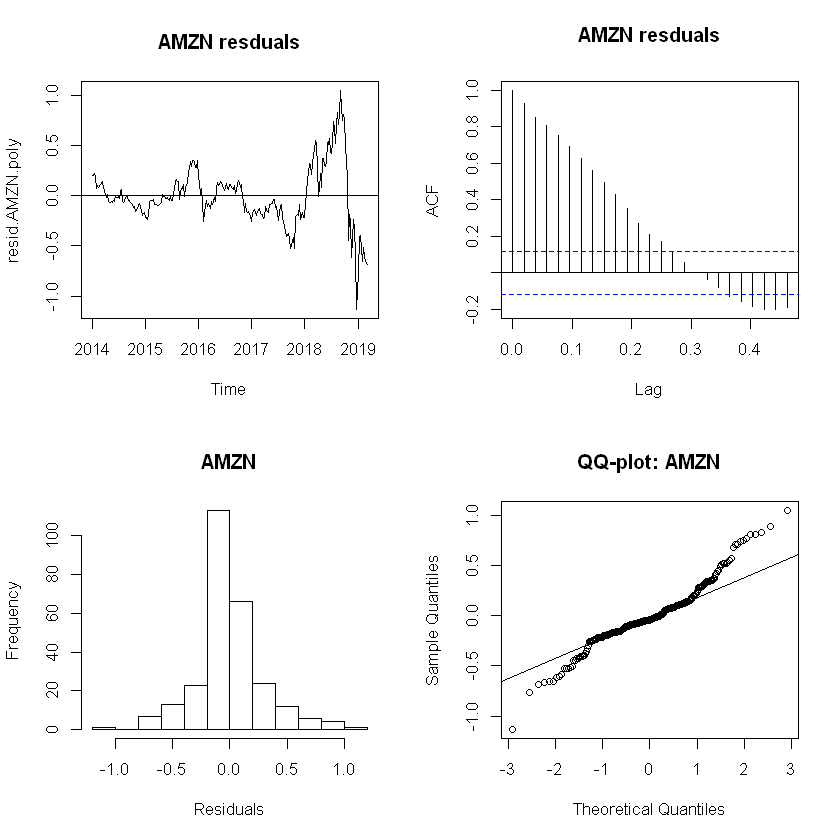

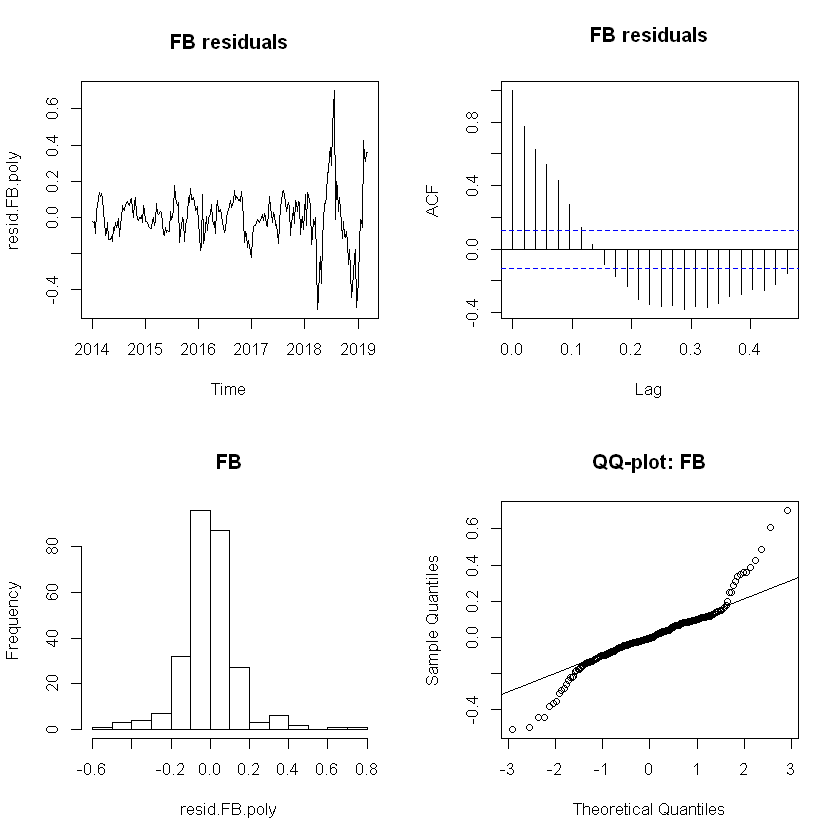

In [174]:
resid.AMZN.poly=ts(residuals(poly.AMZN), start=c(2014,1), freq=52)
resid.FB.poly=ts(residuals(gam.FB), start=c(2014,1), freq=52)

par(mfrow=c(2,2))
plot(resid.AMZN.poly, main="AMZN resduals")
abline(h=0)
stats::acf(resid.AMZN.poly,main="AMZN resduals" )
hist(resid.AMZN.poly,xlab='Residuals',main='AMZN')
qqnorm(resid.AMZN.poly,main="QQ-plot: AMZN")
qqline(resid.AMZN.poly)



plot(resid.FB.poly, main="FB residuals")
stats::acf(resid.FB.poly, main="FB residuals")
hist(resid.FB.poly,main='FB')
qqnorm(resid.FB.poly,main="QQ-plot: FB")
qqline(resid.FB.poly)

In [ ]:
**********************************************ARIMA*****************************************************

In [ ]:
Answer: acf and pacf have no significant lag except for acf at zero. Overal seems statinary and like a white noise but
for and ARMA proces we cant find p and q orders from acf and pacg graphs. That approach is for pure MA or AR

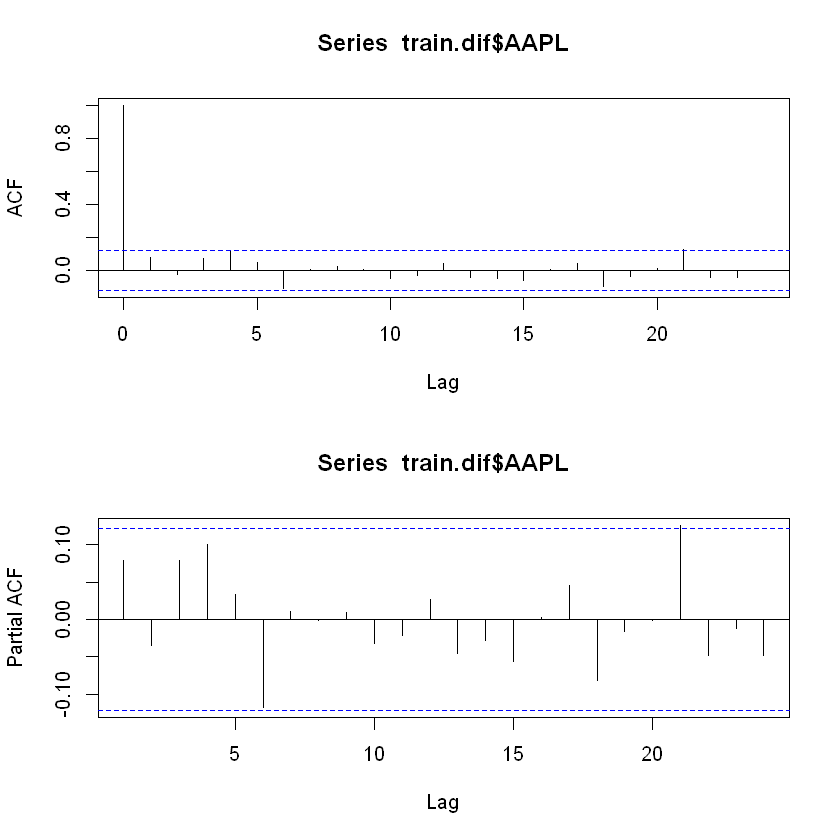

In [180]:
par(mfrow=c(2,1))
stats::acf(train.dif$AAPL)
stats::pacf(train.dif$AAPL)

In [ ]:
Answer: for AAPL, order of (3,1,3) was selected

In [181]:
AAPL.train=ts(train$AAPL, start=c(2014,1), freq=52)
GOOG.train=ts(train$GOOG, start=c(2014,1), freq=52)

In [182]:
test_modelA <- function(p,d,q){
  model = arima(AAPL.train, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  #print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:4){
  for (d in 0:2){
    for (q in 0:4) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

,p,d,q,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
69,4,1,4,-733.1826
68,4,1,3,-734.0249
55,3,1,4,-734.0685
41,2,1,4,-735.2308
67,4,1,2,-735.4337
54,3,1,3,-735.6907


In [ ]:
Answer: for GOOG, (2,1,2) is the lowest but (2,1,0) is within 2 AIC and we select (2,1,0)

In [184]:
test_modelA <- function(p,d,q){
  model = arima(GOOG.train, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  #print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:4){
  for (d in 0:2){
    for (q in 0:4) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

,p,d,q,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
52,3,1,0,-872.9408
54,3,1,2,-873.6940
40,2,1,3,-873.7427
9,0,1,2,-873.8059
37,2,1,0,-874.8510
39,2,1,2,-875.5016


In [ ]:
Answer: There is one ar coeffcient between -1 and 1 and therfore not stationary and not causal in AAPL. 
Also coeffcints in MA are very close and indication of non statinarity.

In GOOG, bothe roots are above 1 and stationary
[1] "AAPL AR roots"
0.613048231396822   1.76642589423238   1.76642589423238
[1] "AAPL MA roots"
1.00004688339824    1.00004688339824   2.53443870077484
[1] "GOOG AR roots"
2.21821459142078    2.63935144829276

In [185]:
arima.AAPL = arima(AAPL.train, order = c(3,1,3), method = "ML") 
arima.GOOG = arima(GOOG.train, order = c(2,1,0), method = "ML") 

arima.AAPL
arima.GOOG

print("AAPL AR roots")
abs(polyroot(c(1, coef(arima.AAPL)[1:3])))
print("AAPL MA roots")
abs(polyroot(c(1, coef(arima.AAPL)[4:6])))

print("GOOG AR roots")
abs(polyroot(c(1, coef(arima.GOOG)[1:2])))



Call:
arima(x = AAPL.train, order = c(3, 1, 3), method = "ML")

Coefficients:
         ar1      ar2     ar3      ma1     ma2      ma3
      0.7652  -1.0920  0.5228  -0.7096  1.1242  -0.3945
s.e.  0.4571   0.1113  0.4402   0.4986  0.1576   0.5016

sigma^2 estimated as 0.003202:  log likelihood = 374.85,  aic = -737.69


Call:
arima(x = GOOG.train, order = c(2, 1, 0), method = "ML")

Coefficients:
          ar1      ar2
      -0.0719  -0.1708
s.e.   0.0616   0.0620

sigma^2 estimated as 0.001977:  log likelihood = 440.43,  aic = -876.85

[1] "AAPL AR roots"


[1] 0.6130482 1.7664259 1.7664259

[1] "AAPL MA roots"


[1] 1.000047 1.000047 2.534439

[1] "GOOG AR roots"


[1] 2.218215 2.639351

In [186]:
AAPL.arima.pred=predict(arima.AAPL, n.ahead=9)
GOOG.arima.pred=predict(arima.GOOG, n.ahead=9)

#MAPE
print("MAPE AAPL")
mean(abs(AAPL.arima.pred$pred - test$AAPL)/abs(test$AAPL))
print("MAPE GOOG")
mean(abs(GOOG.arima.pred$pred - test$GOOG)/abs(test$GOOG))
#Precision
print("Precision AAPL")
sum((AAPL.arima.pred$pred-test$AAPL)^2)/sum((test$AAPL-mean(test$AAPL))^2)
print("Precision GOOG")
sum((GOOG.arima.pred$pred-test$GOOG)^2)/sum((test$GOOG-mean(test$GOOG))^2)

[1] "MAPE AAPL"


[1] 0.1166006

[1] "MAPE GOOG"


[1] 0.1255936

[1] "Precision AAPL"


[1] 1.792768

[1] "Precision GOOG"


[1] 7.117953

In [ ]:
Answer: Model underpredicts. It also dsnt capture the variations.
Not very good model but acceptable since true value within confidence band

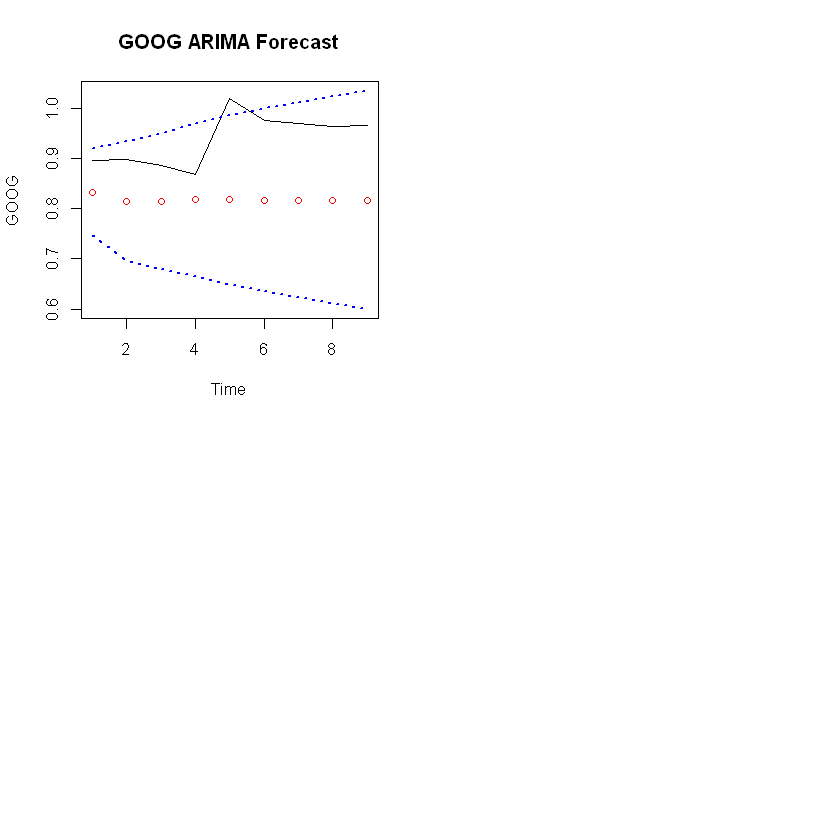

In [188]:
ubound = GOOG.arima.pred$pred +1.96*GOOG.arima.pred$se
lbound = GOOG.arima.pred$pred-1.96*GOOG.arima.pred$se
ymin = min(lbound)
ymax = max(ubound)

par(mfrow=c(2,2))

plot(1:9, test$GOOG,type="l", ylim=c(ymin,ymax), xlab="Time", ylab = 'GOOG', main="GOOG ARIMA Forecast")
points(1:9,GOOG.arima.pred$pred ,col="red")
lines(1:9,ubound,lty=3,lwd= 2, col="blue")
lines(1:9,lbound,lty=3,lwd= 2, col="blue")

In [ ]:
******************************************************VAR***********************

In [ ]:
Answer: p selected=2
all tests are have very small p value meaning reject null hypothesis and therfore no constant variance, no normality
and residuals are correlated

In [189]:
##Model Selection
var.train.dif=ts(train.dif, start=c(2014,1), freq=52)
data.train=ts.union(var.train.dif)

VARselect(data.train, lag.max = 30, type="both")$selection


AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      1      1      2

In [123]:
model.var=VAR(data.train, p=2,type="both")
#summary(model.var)
arch.test(model.var)
normality.test(model.var)
serial.test(model.var)



	ARCH (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 1017.8, df = 500, p-value < 2.2e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 1017.8, df = 500, p-value < 2.2e-16



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 4228.8, df = 8, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 171.34, df = 4, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 4057.5, df = 4, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 4228.8, df = 8, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 171.34, df = 4, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model.var
Chi-squared = 4057.5, df = 4, p-value < 2.2e-16





	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model.var
Chi-squared = 310.42, df = 224, p-value = 0.0001156

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model.var
Chi-squared = 310.42, df = 224, p-value = 0.0001156



In [ ]:
Answer: 
I see two diffenet pattern here. For AAPL the measures got worse but for GOOG improved. 
Here I think AAPL is not very dependent on others and VAR didnt do much good but GOOG is getting impact from paramerets.
Maybe one can guess no granger causality from other 3 companies on AAPL.

In [190]:
pred.var = predict(model.var, n.ahead = 9)


AAPL.fit.var = pred.var[[1]]$AAPL[,1]
GOOG.fit.var = pred.var[[1]]$GOOG[,1]

#MAPE
MAPE.AAPL = mean(abs(AAPL.fit.var - test.dif$AAPL)/abs(test.dif$AAPL))
MAPE.GOOG = mean(abs(GOOG.fit.var - test.dif$GOOG)/abs(test.dif$GOOG))

#Precision
Precision.AAPL = sum((AAPL.fit.var-test.dif$AAPL)^2)/sum((test.dif$AAPL-mean(test.dif$AAPL))^2)
Precision.GOOG = sum((GOOG.fit.var-test.dif$GOOG)^2)/sum((test.dif$GOOG-mean(test.dif$GOOG))^2)

print("MAPE AAPL")
MAPE.AAPL 
print("MAPE GOOG")
MAPE.GOOG 

#Precision
print("Precision AAPL")
Precision.AAPL
print("Precision GOOG")
Precision.GOOG 


[1] "MAPE AAPL"


[1] 1.364465

[1] "MAPE GOOG"


[1] 2.99183

[1] "Precision AAPL"


[1] 1.248675

[1] "Precision GOOG"


[1] 0.9752137

In [ ]:
****************************************GARCH********************************

In [ ]:
Answer: Selected is arma(1,0) garch(1,1)

Yt=0.0031727+0.9970383Yt-1+Zt

sigma_t^2=0.0001013+0.1444465Zt-1^2+0.8197287sigma_t-1^2



In [191]:
#GARCH update
test_modelAGG <- function(m,n){
  spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                    mean.model=list(armaOrder=c(1,1), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, train$GOOG, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(m,n,current.bic)
  names(df) <- c("m","n","BIC")
  print(paste(m,n,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("m","n","BIC")


for (m in 0:2){
  for (n in 0:2){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGG(m,n)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)

[1] "0 0 -3.33651778013112"
[1] "0 1 -3.35273791316552"
[1] "0 2 -3.33256377537417"
[1] "1 0 -3.33624199793839"
[1] "1 1 -3.38406629795307"
[1] "1 2 -3.37503067952085"
[1] "2 0 -3.31944762690579"
[1] "2 1 -3.36137669319369"
[1] "2 2 -3.35371064479329"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
2,0,0,-3.336518
3,0,1,-3.352738
10,2,2,-3.353711
9,2,1,-3.361377
7,1,2,-3.375031
6,1,1,-3.384066


In [192]:
#ARMA update
#ARIMA-GARCH ARIMA order
test_modelAGA <- function(p,q){
  spec = ugarchspec(variance.model=list(garchOrder=c(1,1)),
                    mean.model=list(armaOrder=c(p,q), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, train$GOOG, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(p,q,current.bic)
  names(df) <- c("p","q","BIC")
  print(paste(p,q,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("p","q","BIC")


for (p in 0:4){
  for (q in 0:4){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGA(p,q)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)

[1] "0 0 0.0717381298661982"
[1] "0 1 -0.805591101528872"
[1] "0 2 -1.36976132068664"
[1] "0 3 -1.7587570677331"
[1] "0 4 -1.94016199559539"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "1 0 -3.39629866804102"
[1] "1 1 -3.384066297871"
[1] "1 2 -3.37366791987464"
[1] "1 3 -3.35704480493681"
[1] "1 4 -3.33727035858523"
[1] "2 0 -3.38487119648788"
[1] "2 1 -3.37313870716823"
[1] "2 2 -3.36221547716773"
[1] "2 3 -3.34318353069626"
[1] "2 4 -3.39307132635665"
[1] "3 0 -3.38481652538328"
[1] "3 1 -3.36371758211347"
[1] "3 2 -3.37348376054928"
[1] "3 3 -3.35701316220222"
[1] "3 4 -3.33508432773667"
[1] "4 0 -3.3658394406842"
[1] "4 1 -3.34460542263777"
[1] "4 2 -3.35596048868544"
[1] "4 3 -3.32977526367827"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "4 4 -3.31709212899351"


,p,q,BIC
,<dbl>,<dbl>,<dbl>
9,1,2,-3.373668
8,1,1,-3.384066
17,3,0,-3.384817
12,2,0,-3.384871
16,2,4,-3.393071
7,1,0,-3.396299


In [193]:
#GARCH update
test_modelAGG <- function(m,n){
  spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                    mean.model=list(armaOrder=c(1,0), 
                                    include.mean=T), distribution.model="std")    
  fit = ugarchfit(spec, train$GOOG, solver = 'hybrid')
  current.bic = infocriteria(fit)[2]
  df = data.frame(m,n,current.bic)
  names(df) <- c("m","n","BIC")
  print(paste(m,n,current.bic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf)
names(orders) <- c("m","n","BIC")


for (m in 0:2){
  for (n in 0:2){
    possibleError <- tryCatch(
      orders<-rbind(orders,test_modelAGG(m,n)),
      error=function(e) e
    )
    if(inherits(possibleError, "error")) next
  }
}
orders <- orders[order(-orders$BIC),]
tail(orders)

Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "0 0 -3.34959893384065"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "0 1 -3.36551322295168"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "0 2 -3.34528905355052"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "1 0 -3.34821201665357"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "1 1 -3.39629866807033"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "1 2 -3.37807948392398"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "2 0 -3.33444148212633"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "2 1 -3.3735416719899"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"

[1] "2 2 -3.35793653426794"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
2,0,0,-3.349599
10,2,2,-3.357937
3,0,1,-3.365513
9,2,1,-3.373542
7,1,2,-3.378079
6,1,1,-3.396299


In [194]:
spec = ugarchspec(variance.model=list(garchOrder=c(1,1)),
                    mean.model=list(armaOrder=c(1,0), 
                                    include.mean=T), distribution.model="std")    
  GOOG.garchfit.1 = ugarchfit(spec, train$GOOG, solver = 'hybrid')

GOOG.garchfit.1


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000000    0.030624  -0.000001 0.999999
ar1     1.000000    0.005773 173.227822 0.000000
omega   0.000051    0.000046   1.110670 0.266711
alpha1  0.091792    0.041566   2.208349 0.027220
beta1   0.894547    0.048550  18.425246 0.000000
shape   6.051465    2.341785   2.584124 0.009763

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.000000    0.003099  -0.000008 0.999994
ar1     1.000000    0.006327 158.062841 0.000000
omega   0.000051    0.000035   1.437343 0.150621
alpha1  0.091792    0.030141   3.045408 0.002324
beta1   0.894547    0.033535  26.675402 0.000000
shape   6.051465    2.320064  

In [160]:
GOOG.garchFit = garchFit(~ arma(1,0) + garch(1,1), data = train$GOOG, trace = FALSE)
GOOG.garchFit


Warning message in sqrt(diag(fit$cvar)):
"NaNs produced"


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 0) + garch(1, 1), data = train$GOOG, 
    trace = FALSE) 

Mean and Variance Equation:
 data ~ arma(1, 0) + garch(1, 1)
<environment: 0x0000000051b19cb0>
 [data = train$GOOG]

Conditional Distribution:
 norm 

Coefficient(s):
        mu         ar1       omega      alpha1       beta1  
0.00317265  0.99703828  0.00010129  0.14444646  0.81972875  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     0.0031727   0.0031898    0.995     0.32    
ar1    0.9970383   0.0073288  136.043  < 2e-16 ***
omega  0.0001013          NA       NA       NA    
alpha1 0.1444465   0.0324222    4.455 8.38e-06 ***
beta1  0.8197287   0.0362615   22.606  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 454.281    normalized:  1.74054 

Description:
 Sat Apr 25 13:42:40 2020 by user: bbalamdari 


In [161]:
#residuals(GOOG.garchFit)

resid.garch=residuals(GOOG.garchfit.1)
jarque.bera.test(resid.garch)

#arch.test(resid.garch)


	Jarque Bera Test

data:  resid.garch
X-squared = 47.606, df = 2, p-value = 4.596e-11


In [165]:
train.52 <- train$GOOG[0:(length(train)-52)]
train.52.ts <- ts(train.52,start=c(2014,1),freq=52)

test.52 <- train.52[(length(train.52)-51):length(train.52)]
test.ts <- ts(test.52,start=c(2018,1),freq=52)




In [166]:
nfore = length(test.ts)
fore.series = NULL
fore.sigma = NULL



for(f in 1: nfore){
    ## Fit models
    data = train.ts
    if(f>2)
       data = c(train.ts,test.ts[1:(f-1)])
    final.model= ugarchfit(spec, data, solver = 'hybrid')
    ## Forecast
    fore = ugarchforecast(final.model, n.ahead=1)
    fore.series = c(fore.series, fore@forecast$seriesFor)
    fore.sigma = c(fore.sigma, fore@forecast$sigmaFor)
}


In [168]:
## MAPE and Precision
MAPE.garch = mean(abs(fore.series - test.ts)/test.ts)
Precision.garch = sum((fore.series - test.ts)^2)/sum((test.ts-mean(test.ts))^2)

print("MAPE:ARMA-GARCH")
MAPE.garch
print("PM: ARMA(1,0)-GARCH(1,1)")
Precision.garch


print("ARIMA Approach:")
#MAPE
print("MAPE GOOG")
mean(abs(GOOG.arima.pred$pred - test$GOOG)/abs(test$GOOG))
#Precision
print("Precision GOOG")
sum((GOOG.arima.pred$pred-test$GOOG)^2)/sum((test$GOOG-mean(test$GOOG))^2)

[1] "MAPE:ARMA-GARCH"


[1] 0.05990092

[1] "PM: ARMA(1,0)-GARCH(1,1)"


[1] 0.2997227

[1] "ARIMA Approach:"
[1] "MAPE GOOG"


[1] 0.1255936

[1] "Precision GOOG"


[1] 7.117953